# Simulation Study

In [1]:
from preamble import *
from infer_loss_distribution import *
from infer_count_distribution import *

%config InlineBackend.figure_format = 'retina'
%load_ext lab_black

In [2]:
# dill.load_session("Sim_Weibull_Gamma.pkl")

In [3]:
import sys

print("ABC version:", abc.__version__)
print("Python version:", sys.version)
print("Numpy version:", np.__version__)
print("PyMC3 version:", pm.__version__)
print("Arviz version:", arviz.__version__)

tic()

ABC version: 0.1.1
Python version: 3.8.10 (default, May 19 2021, 18:05:58) 
[GCC 7.3.0]
Numpy version: 1.20.3
PyMC3 version: 3.11.2
Arviz version: 0.11.2


In [4]:
FAST = False

# Processor information and SMC calibration parameters
if not FAST:
    numIters = 7
    numItersData = 10
    popSize = 1000
    popSizeModels = 1000
    epsMin = 0
    timeout = 1000
else:
    numIters = 4
    numItersData = 8
    popSize = 500
    popSizeModels = 1000
    epsMin = 1
    timeout = 30

smcArgs = {"timeout": timeout, "epsMin": epsMin, "verbose": True}
smcArgs["numProcs"] = 40

## Model selection

In this notebook we are are conducting a simulation experiment where the claim frequency are Negative Binomial distributed 

$$
n_s\underset{\textbf{i.i.d.}}{\sim}\text{Neg-Bin}(\alpha = 4, p = 2/3),\text{ }s = 1,\ldots, 30
$$ 

and the individual claim sizes are weibull distributed

$$
u_1,\ldots, u_{n_s}\underset{\textbf{i.i.d.}}{\sim}\text{Weib}(k = 1/2, \beta = 1),\text{ }s = 1,\ldots 30.
$$ 

The available data is aggregated claim sizes in excess of the priority $c=1$ asociated to aa global stop-loss treaty, we have 

$$
x_s = \left(\sum_{k = 1}^{n_s}u_k-c\right)_{+},\text{ }s = 1,\ldots, t.
$$

Our aim is to look into the finite sample performance of our ABC implementation when deciding which model is the most suited.

In [5]:
rg = default_rng(123)

sample_sizes = [50, 250]
T = sample_sizes[-1]
t = np.arange(1, T + 1, 1)

# Frequency-Loss Model
α, p, k, β = 4, 2 / 3, 1 / 3, 1
θ_True = α, p, k, β
θ_sev = k, β
θ_freq = α, p
freq = "negative binomial"
sev = "weibull"

# Aggregation process
c = 1
psi = abc.Psi("GSL", c)

freqs, sevs = abc.simulate_claim_data(rg, T, freq, sev, θ_True)
df_full = pd.DataFrame(
    {
        "time_period": np.concatenate([np.repeat(s, freqs[s - 1]) for s in t]),
        "claim_size": sevs,
    }
)

xData = abc.compute_psi(freqs, sevs, psi)

df_agg = pd.DataFrame({"time_period": t, "N": freqs, "X": xData})

In [6]:
[np.sum(xData[:ss] > 0) for ss in sample_sizes]

[23, 130]

## True posterior samples

We run a Bayesian analysis on the individual claim data and compuet the model probabilities when a Weibull or a gamma distribution is assumed. The prior distribution on the parameters are taken as independent uniform distribution (as in the ABC approach). 

### Fitting a Weibull and a gamma model to the individual loss data

The number of individual claim sizes is  98


Initializing SMC sampler...
Sampling 1 chain in 1 job
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.001
Stage:   2 Beta: 0.015
Stage:   3 Beta: 0.069
Stage:   4 Beta: 0.163
Stage:   5 Beta: 0.427
Stage:   6 Beta: 1.000
/home/plaub/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


CPU times: user 1.37 s, sys: 88.3 ms, total: 1.46 s
Wall time: 2.4 s
The number of individual claim sizes is  525


Initializing SMC sampler...
Sampling 1 chain in 1 job
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.000
Stage:   2 Beta: 0.003
Stage:   3 Beta: 0.014
Stage:   4 Beta: 0.034
Stage:   5 Beta: 0.090
Stage:   6 Beta: 0.276
Stage:   7 Beta: 0.946
Stage:   8 Beta: 1.000
/home/plaub/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


CPU times: user 1.96 s, sys: 4.12 ms, total: 1.97 s
Wall time: 1.96 s
The number of individual claim sizes is  98


Initializing SMC sampler...
Sampling 1 chain in 1 job
Stage:   0 Beta: 0.001
Stage:   1 Beta: 0.003
Stage:   2 Beta: 0.016
Stage:   3 Beta: 0.076
Stage:   4 Beta: 0.339
Stage:   5 Beta: 1.000
/home/plaub/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


CPU times: user 1.27 s, sys: 12.2 ms, total: 1.28 s
Wall time: 1.28 s
The number of individual claim sizes is  525


Initializing SMC sampler...
Sampling 1 chain in 1 job
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.001
Stage:   2 Beta: 0.003
Stage:   3 Beta: 0.015
Stage:   4 Beta: 0.070
Stage:   5 Beta: 0.353
Stage:   6 Beta: 1.000
/home/plaub/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


CPU times: user 1.15 s, sys: 7.64 ms, total: 1.16 s
Wall time: 1.15 s


,model,ss,k,β,marginal_log_likelihood,BF,model_probability
0,True weibull,50.0,0.336828,1.012060,-90.848702,1.000000e+00,9.999998e-01
0,True weibull,250.0,0.315289,0.886874,-410.439780,1.000000e+00,1.000000e+00
0,True gamma,50.0,0.194597,40.320096,-106.467064,1.648283e-07,1.648283e-07
0,True gamma,250.0,0.188851,38.701698,-463.865195,6.275335e-24,6.275335e-24


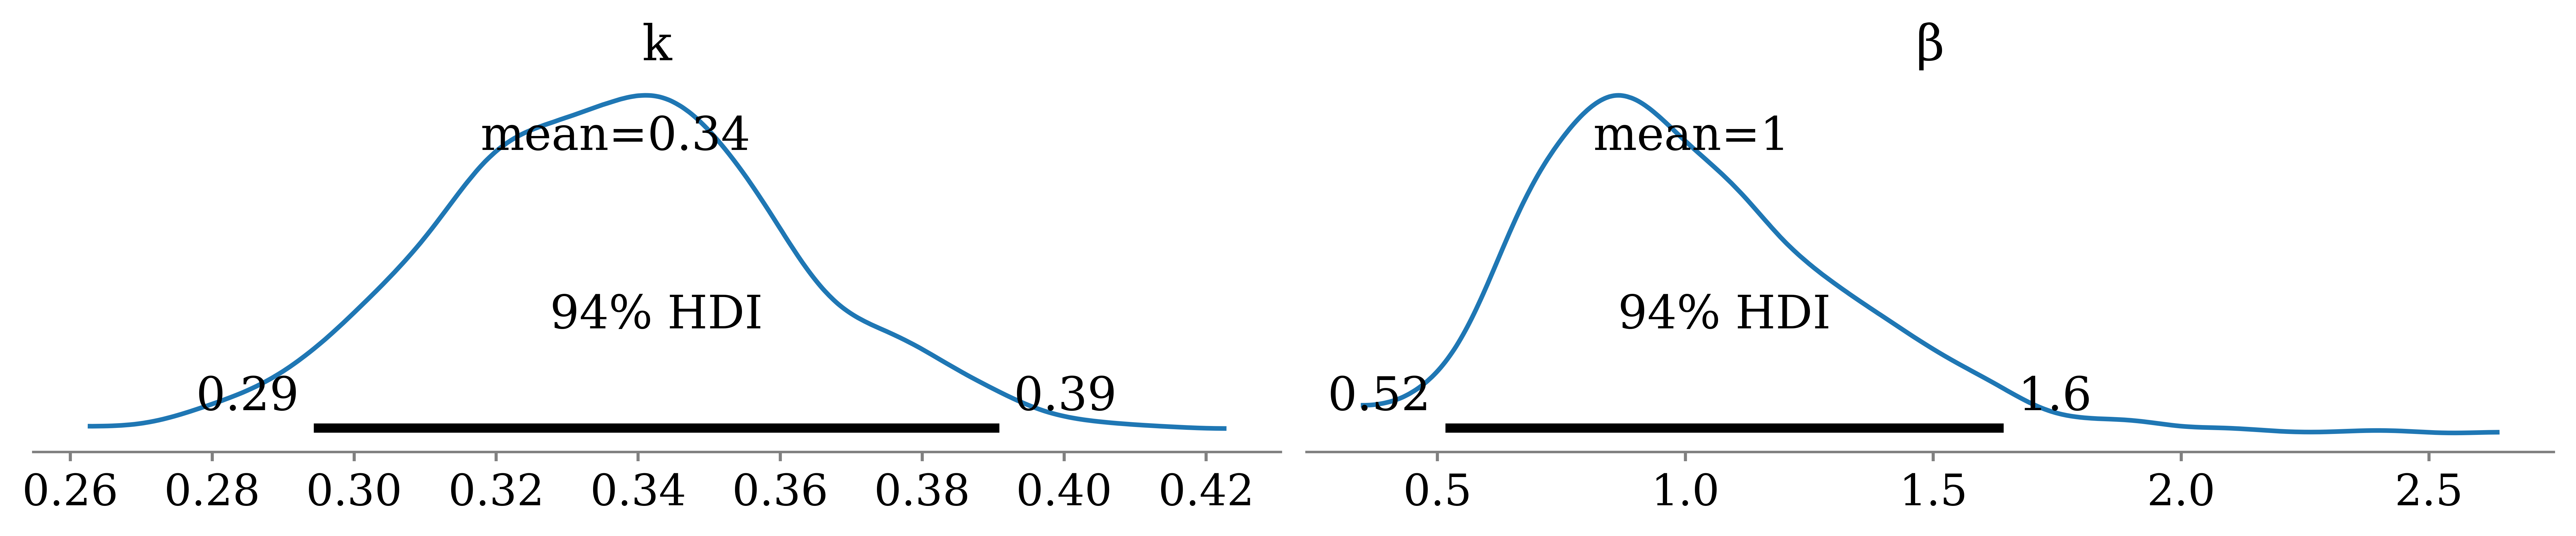

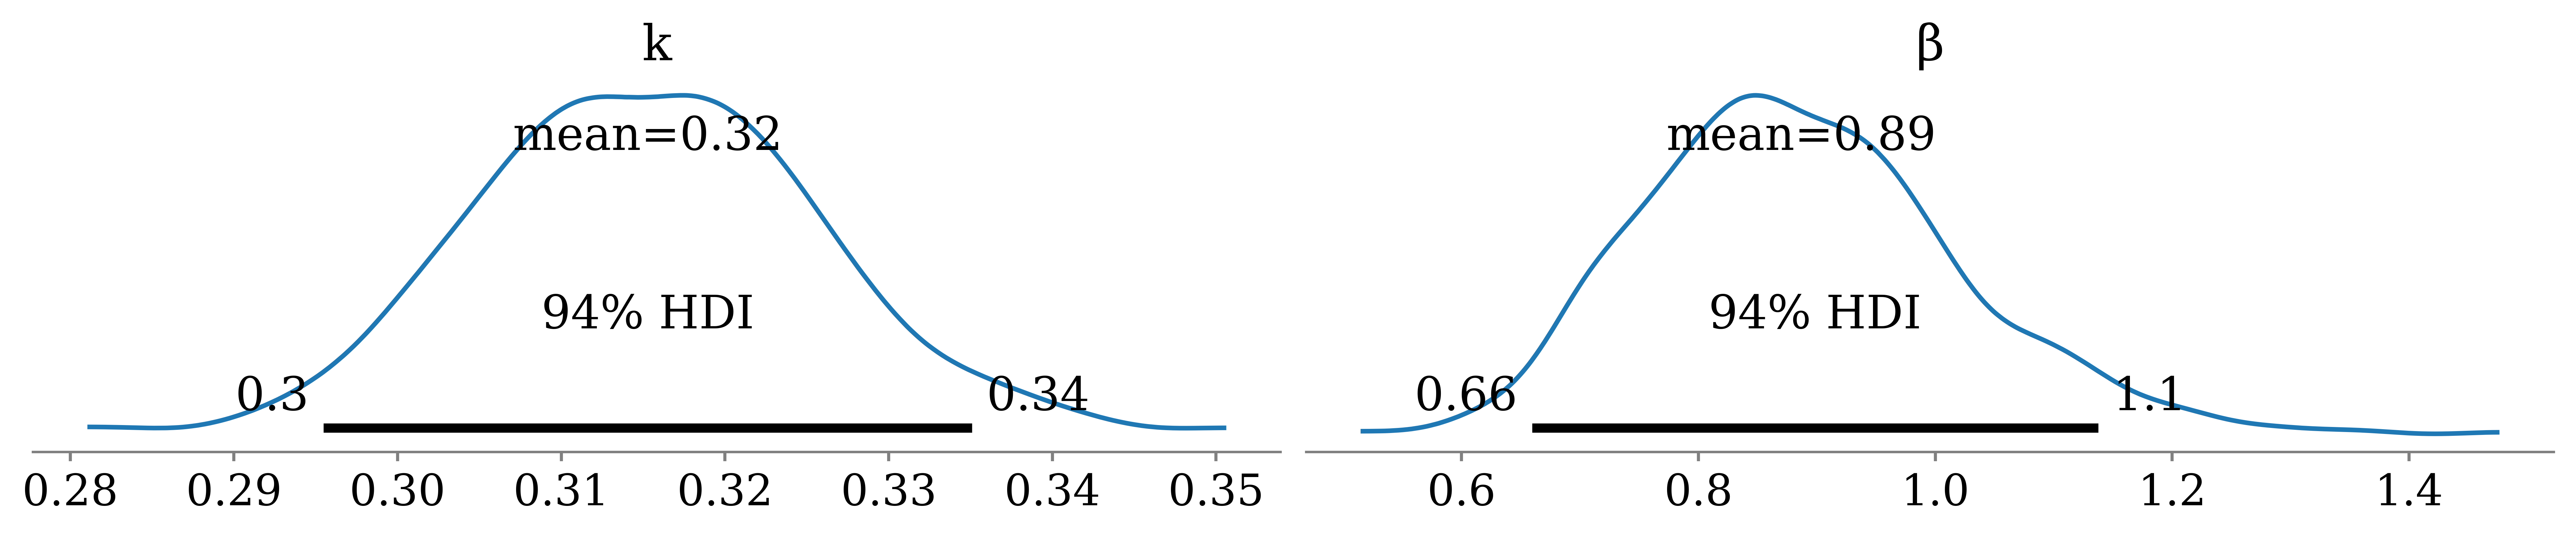

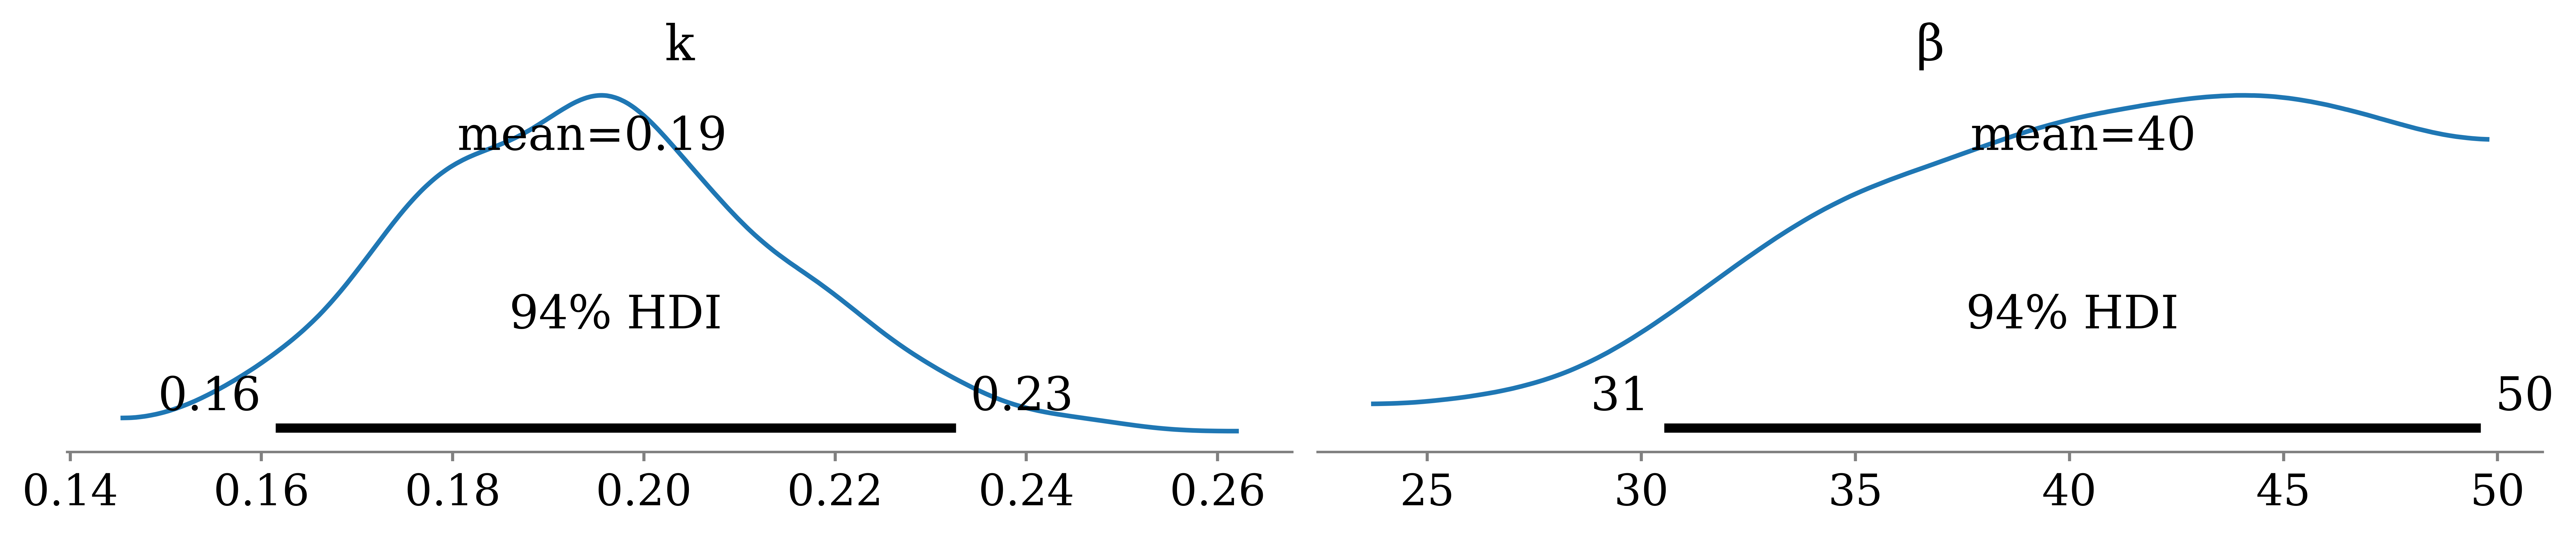

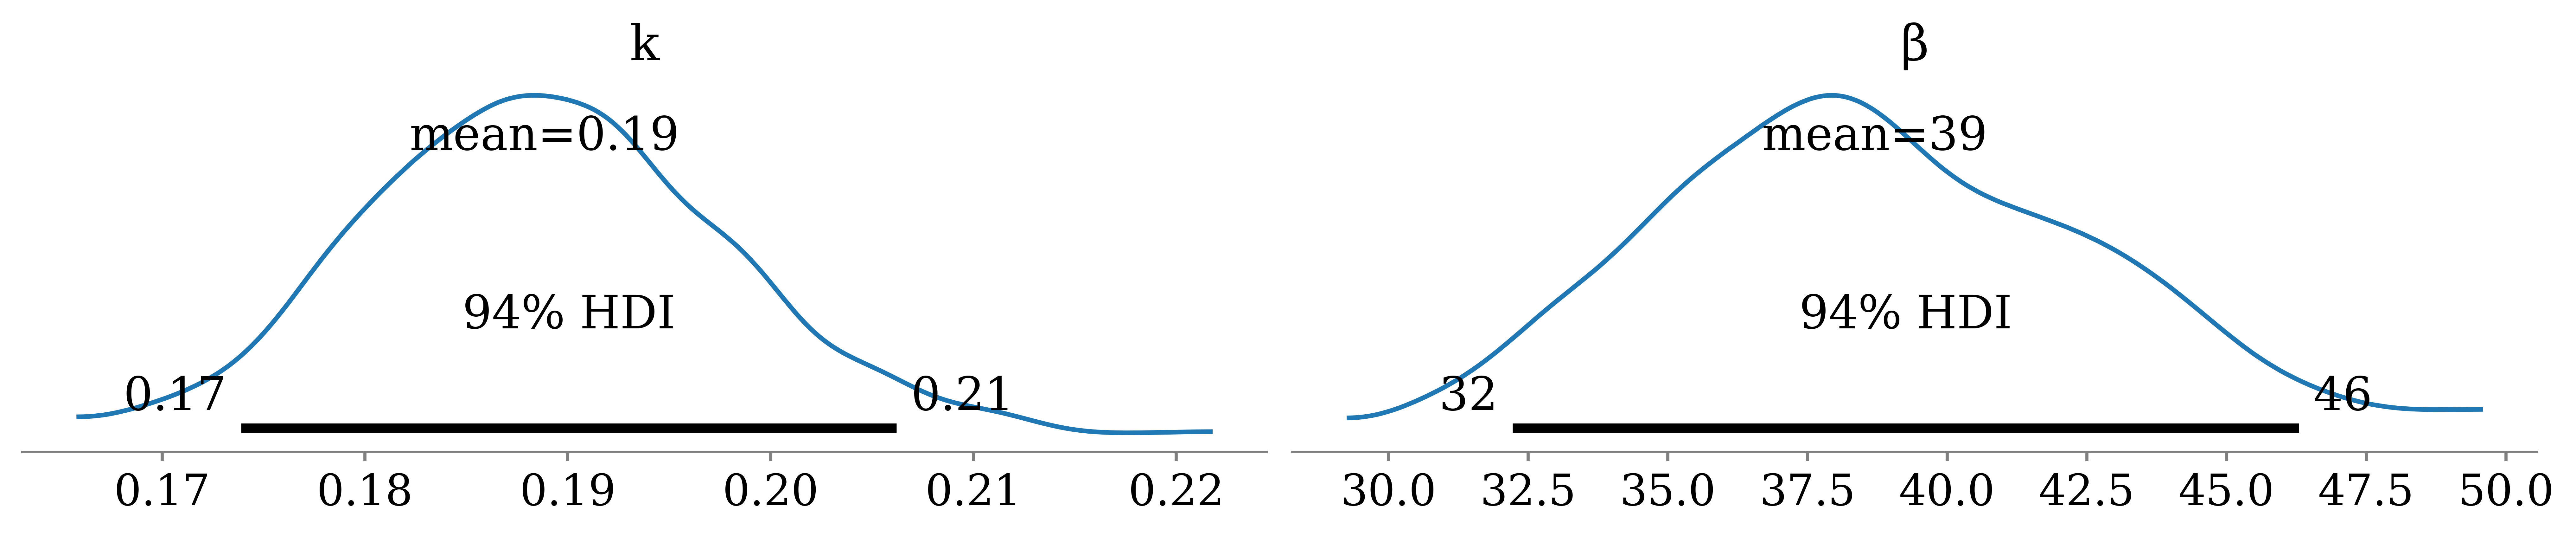

In [7]:
Bayesian_Summary = pd.DataFrame({"model": [], "ss": [], "k": [], "β": []})
models = ["True weibull", "True gamma"]
for m in models:
    for ss in sample_sizes:

        uData = np.array(df_full.claim_size[df_full.time_period <= ss])
        print("The number of individual claim sizes is ", len(uData))
        if m == "True weibull":
            # We fit a Weibull model using SMC
            with pm.Model() as model_sev:
                k = pm.Uniform("k", lower=1e-1, upper=10)
                β = pm.Uniform("β", lower=0, upper=20)
                U = pm.Weibull("U", alpha=k, beta=β, observed=uData)
                %time trace = pm.sample_smc(popSize, random_seed=1, chains=1)

        elif m == "True gamma":
            # We fit a gamma model using SMC
            with pm.Model() as model_sev:
                param1 = pm.Uniform("k", lower=0, upper=10)
                param2 = pm.Uniform("β", lower=0, upper=50)
                U = pm.Gamma("U", alpha=param1, beta=1 / param2, observed=uData)
                %time trace = pm.sample_smc(popSize, random_seed=1, chains=1)

        arviz.plot_posterior(trace)

        log_lik = trace.report.log_marginal_likelihood[0]

        res = pd.DataFrame(
            {
                "model": [m],
                "ss": [ss],
                "k": [trace["k"].mean()],
                "β": [trace["β"].mean()],
                "marginal_log_likelihood": [log_lik],
            }
        )
        Bayesian_Summary = pd.concat([Bayesian_Summary, res])

max_marginal_log_likelihood = (
    Bayesian_Summary[["ss", "marginal_log_likelihood"]]
    .groupby("ss")
    .max()
    .marginal_log_likelihood.values
)
max_marginal_log_likelihood = np.concatenate(
    [max_marginal_log_likelihood, max_marginal_log_likelihood]
)
Bayesian_Summary["BF"] = np.exp(
    Bayesian_Summary.marginal_log_likelihood - max_marginal_log_likelihood
)
sum_BF = Bayesian_Summary[["ss", "BF"]].groupby("ss").sum().BF.values
sum_BF = np.concatenate([sum_BF, sum_BF])
Bayesian_Summary["model_probability"] = Bayesian_Summary.BF / sum_BF
Bayesian_Summary

In [8]:
# Frequency-Loss Model
α, p, k, β = 4, 2 / 3, 1 / 3, 1
rg = default_rng(123)
uData_10000 = abc.simulate_claim_sizes(rg, 10000, sev, θ_sev)
r_mle, m_mle, BIC = infer_gamma(uData_10000, [1, 1])

θ_plot = [[α, p, k, β], [α, p, np.NaN, np.NaN]]
θ_mle = [[np.NaN, np.NaN, np.NaN, np.NaN], [np.NaN, np.NaN, r_mle, m_mle]]

## ABC posterior for choosing between Weibull and gamma to model the claim sizes

In [9]:
params = (("α", "p", "k", "β"), ("α", "p", "r", "m"))

prior1 = abc.IndependentUniformPrior(
    [(0, 20), (1e-3, 1), (1e-1, 10), (0, 20)], params[0]
)
model1 = abc.Model("negative binomial", "weibull", psi, prior1)

prior2 = abc.IndependentUniformPrior(
    [(0, 20), (1e-3, 1), (1e-1, 10), (0, 50)], params[1]
)
model2 = abc.Model("negative binomial", "gamma", psi, prior2)

models = [model1, model2]
model_names = ["ABC negative binomial - weibull", "ABC negative binomial - gamma"]

In [10]:
model_proba_abc = pd.DataFrame({"model": [], "ss": [], "model_probability": []})
dfabc = pd.DataFrame(
    {"model": [], "ss": [], "weights": [], "α": [], "p": [], "param1": [], "param2": []}
)

for ss in sample_sizes:
    xDataSS = df_agg.X[df_agg.time_period <= ss].values

    %time fit = abc.smc(numIters, popSizeModels, xDataSS, models, **smcArgs)

    for k in range(len(models)):
        weights = fit.weights[fit.models == k]
        res_mp = pd.DataFrame(
            {
                "model": pd.Series([model_names[k]]),
                "ss": np.array([ss]),
                "model_probability": pd.Series(np.sum(fit.weights[fit.models == k])),
            }
        )

        model_proba_abc = pd.concat([model_proba_abc, res_mp])

        res_post_samples = pd.DataFrame(
            {
                "model": np.repeat(model_names[k], len(weights)),
                "ss": np.repeat(ss, len(weights)),
                "weights": weights / np.sum(weights),
                "α": np.array(fit.samples)[fit.models == k, 0],
                "p": np.array(fit.samples)[fit.models == k, 1],
                "param1": np.array(fit.samples)[fit.models == k, 2],
                "param2": np.array(fit.samples)[fit.models == k, 3],
            }
        )
        dfabc = pd.concat([dfabc, res_post_samples])

Final population dists <= 10.62, ESS = [261 533]
	model populations = [326, 674], model weights = [0.55 0.45]
CPU times: user 10.6 s, sys: 1.39 s, total: 11.9 s
Wall time: 21.6 s


Final population dists <= 7.07, ESS = [104 726]
	model populations = [138, 862], model weights = [0.59 0.41]
CPU times: user 9.46 s, sys: 655 ms, total: 10.1 s
Wall time: 44.5 s


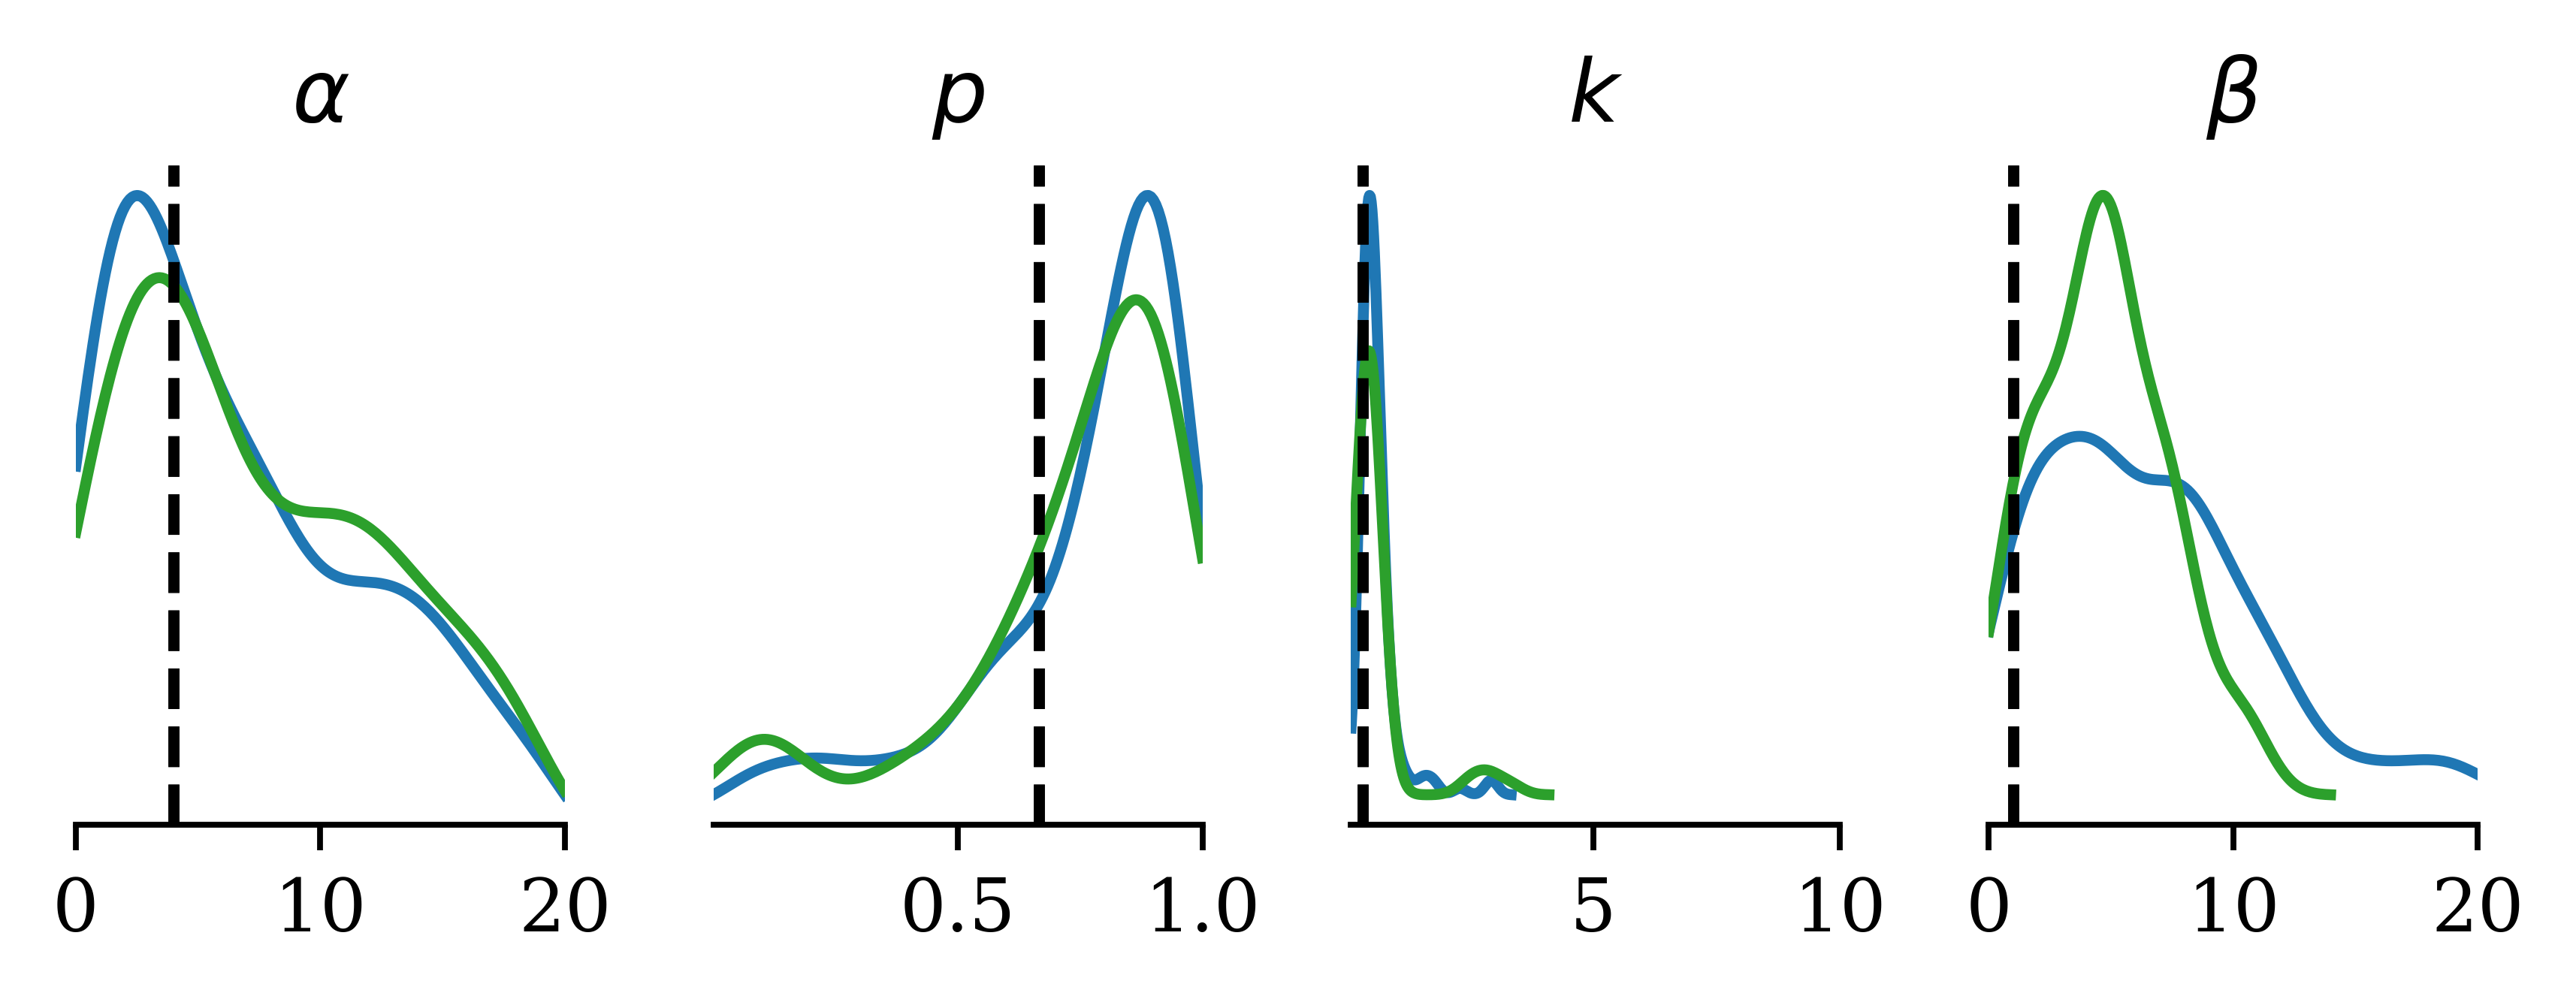

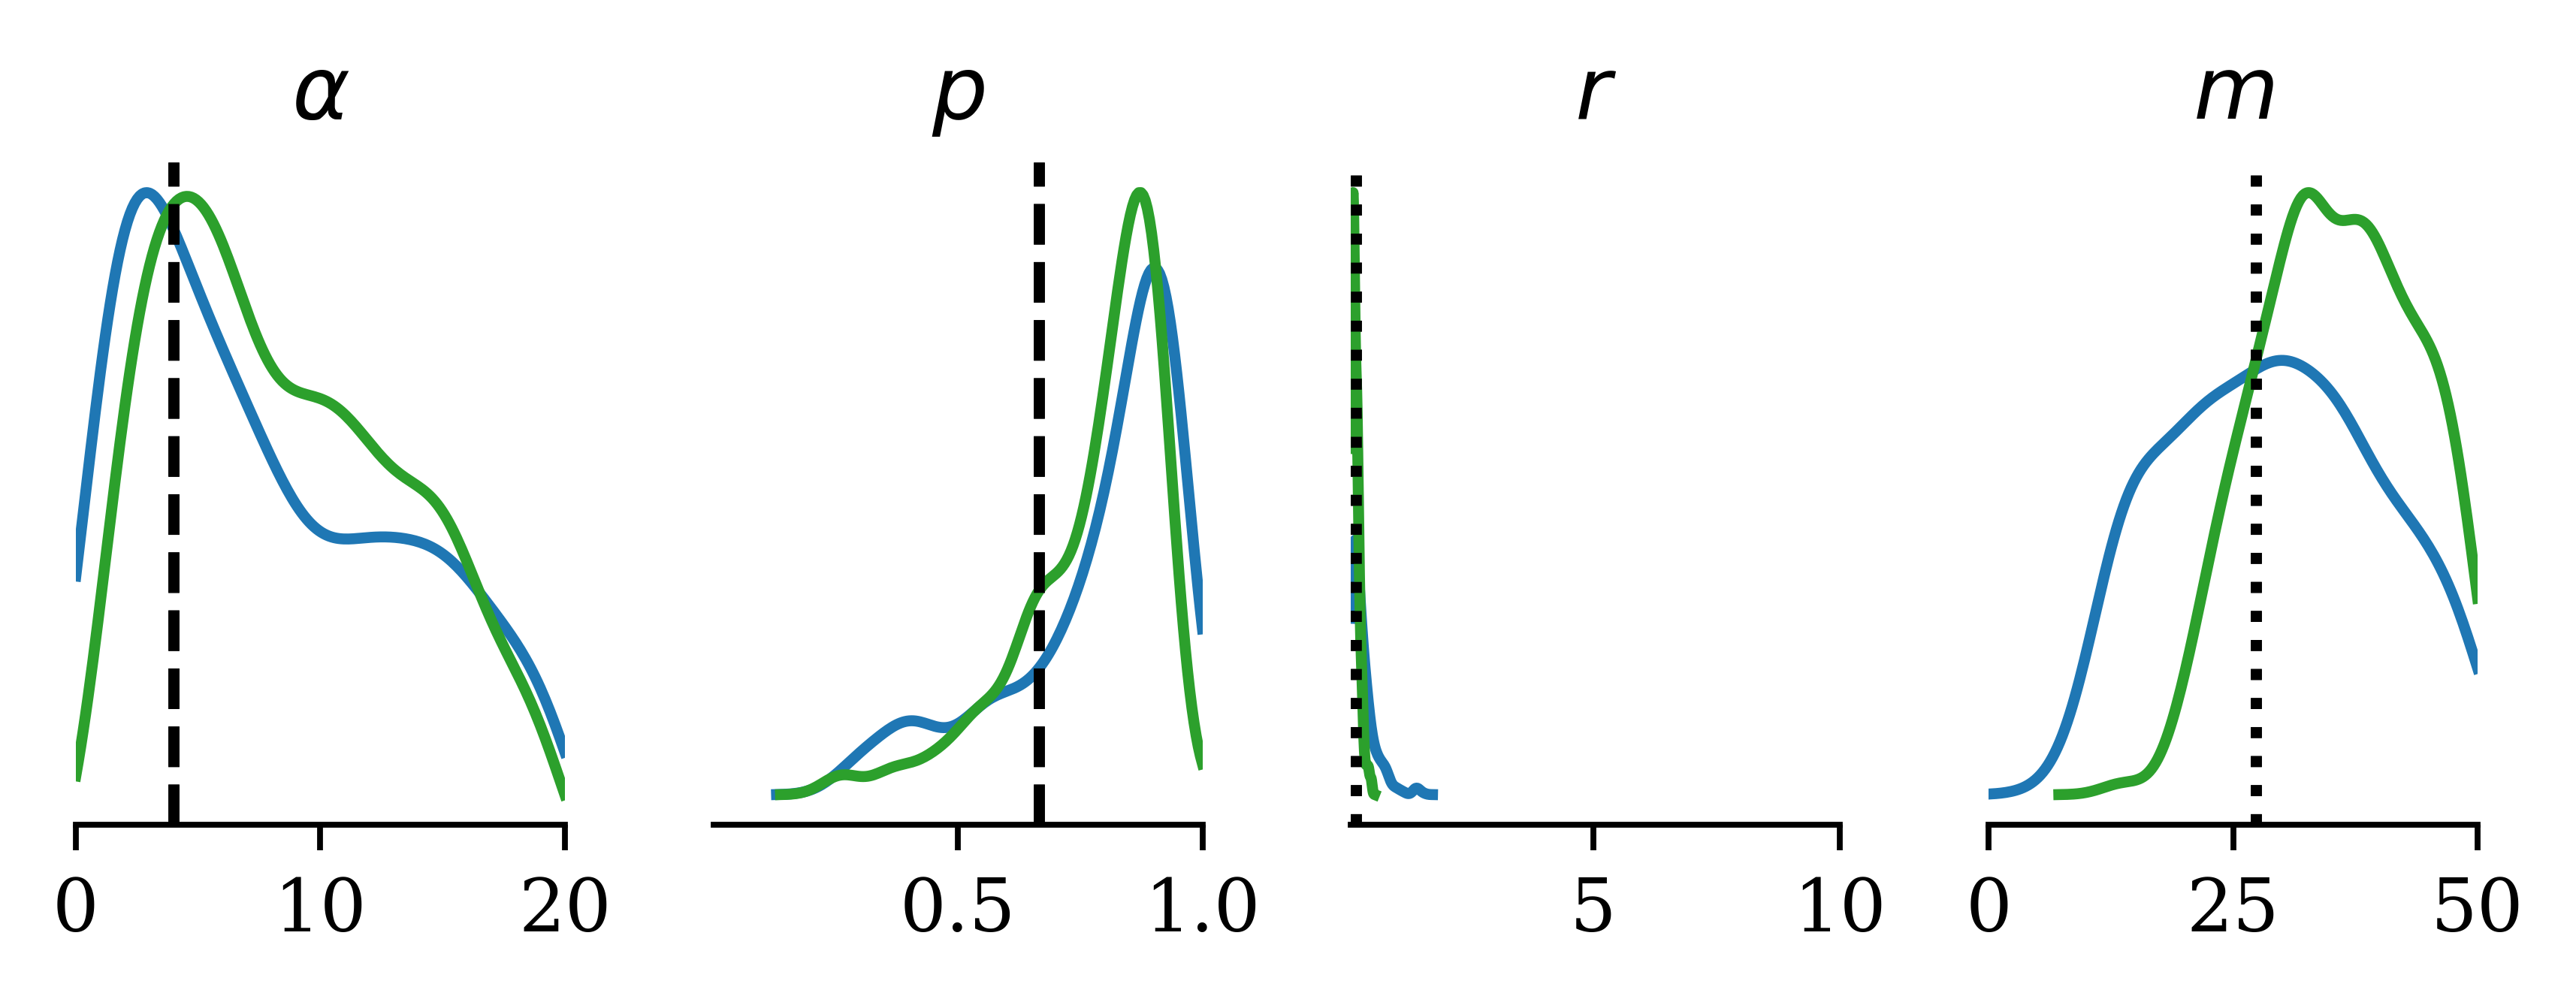

In [11]:
for l in range(len(models)):
    fig, axs = plt.subplots(1, len(params[l]), tight_layout=True)
    prior = models[l].prior

    for k in range(len(params[l])):
        pLims = [prior.marginals[k].isf(1), prior.marginals[k].isf(0)]
        axs[k].set_xlim(pLims)

        for i, ss in enumerate(sample_sizes):
            selector = (dfabc.ss == ss) & (dfabc.model == model_names[l])
            sample = np.array(dfabc[["α", "p", "param1", "param2"]])[selector, k]
            weights = dfabc.weights[selector].values
            dataResampled, xs, ys = abc.resample_and_kde(
                sample, weights / sum(weights), clip=pLims
            )
            axs[k].plot(xs, ys)
            axs[k].axvline(θ_plot[l][k], **trueStyle)
            axs[k].axvline(θ_mle[l][k], **mleStyle)

            axs[k].set_title("$" + params[l][k] + "$")
            axs[k].set_yticks([])

    sns.despine(left=True)
    # plt.save_cropped(f"../Figures/hist-negbin-weibull-model-selection-{l}.pdf")

In [12]:
params = (("k", "β"), ("r", "m"))

prior1 = abc.IndependentUniformPrior([(1e-1, 10), (0, 20)], params[0])
prior2 = abc.IndependentUniformPrior([(0, 10), (0, 50)], params[1])

model_names = ("ABC with freqs - weibull", "ABC with freqs - gamma")

In [13]:
model_proba_abc_freq = pd.DataFrame({"model": [], "ss": [], "model_probability": []})
dfabc_freq = pd.DataFrame(
    {"model": [], "ss": [], "weights": [], "param1": [], "param2": []}
)

for ss in sample_sizes:
    xDataSS = df_agg.X[df_agg.time_period <= ss].values
    nData = df_agg.N[df_agg.time_period <= ss].values

    model1 = abc.Model(nData, "weibull", psi, prior1)
    model2 = abc.Model(nData, "gamma", psi, prior2)
    models = [model1, model2]

    %time fit = abc.smc(numItersData, popSizeModels, xDataSS, models, **smcArgs)

    for k in range(len(models)):
        weights = fit.weights[fit.models == k]
        res_mp = pd.DataFrame(
            {
                "model": pd.Series([model_names[k]]),
                "ss": np.array([ss]),
                "model_probability": pd.Series(np.sum(fit.weights[fit.models == k])),
            }
        )

        model_proba_abc_freq = pd.concat([model_proba_abc_freq, res_mp])

        res_post_samples = pd.DataFrame(
            {
                "model": np.repeat(model_names[k], len(weights)),
                "ss": np.repeat(ss, len(weights)),
                "weights": weights / np.sum(weights),
                "param1": np.array(fit.samples)[fit.models == k, 0],
                "param2": np.array(fit.samples)[fit.models == k, 1],
            }
        )
        dfabc_freq = pd.concat([dfabc_freq, res_post_samples])

Final population dists <= 2.24, ESS = [874   0]
	model populations = [1000, 0], model weights = [1. 0.]
CPU times: user 12.3 s, sys: 983 ms, total: 13.3 s
Wall time: 20.9 s


/home/plaub/miniconda3/lib/python3.8/site-packages/approxbayescomp/smc.py:371: RuntimeWarning: invalid value encountered in double_scalars
  np.sum(weights[ms == m]) ** 2


Final population dists <= 2.35, ESS = [872   0]
	model populations = [1000, 0], model weights = [1. 0.]
CPU times: user 11 s, sys: 904 ms, total: 11.9 s
Wall time: 22.4 s


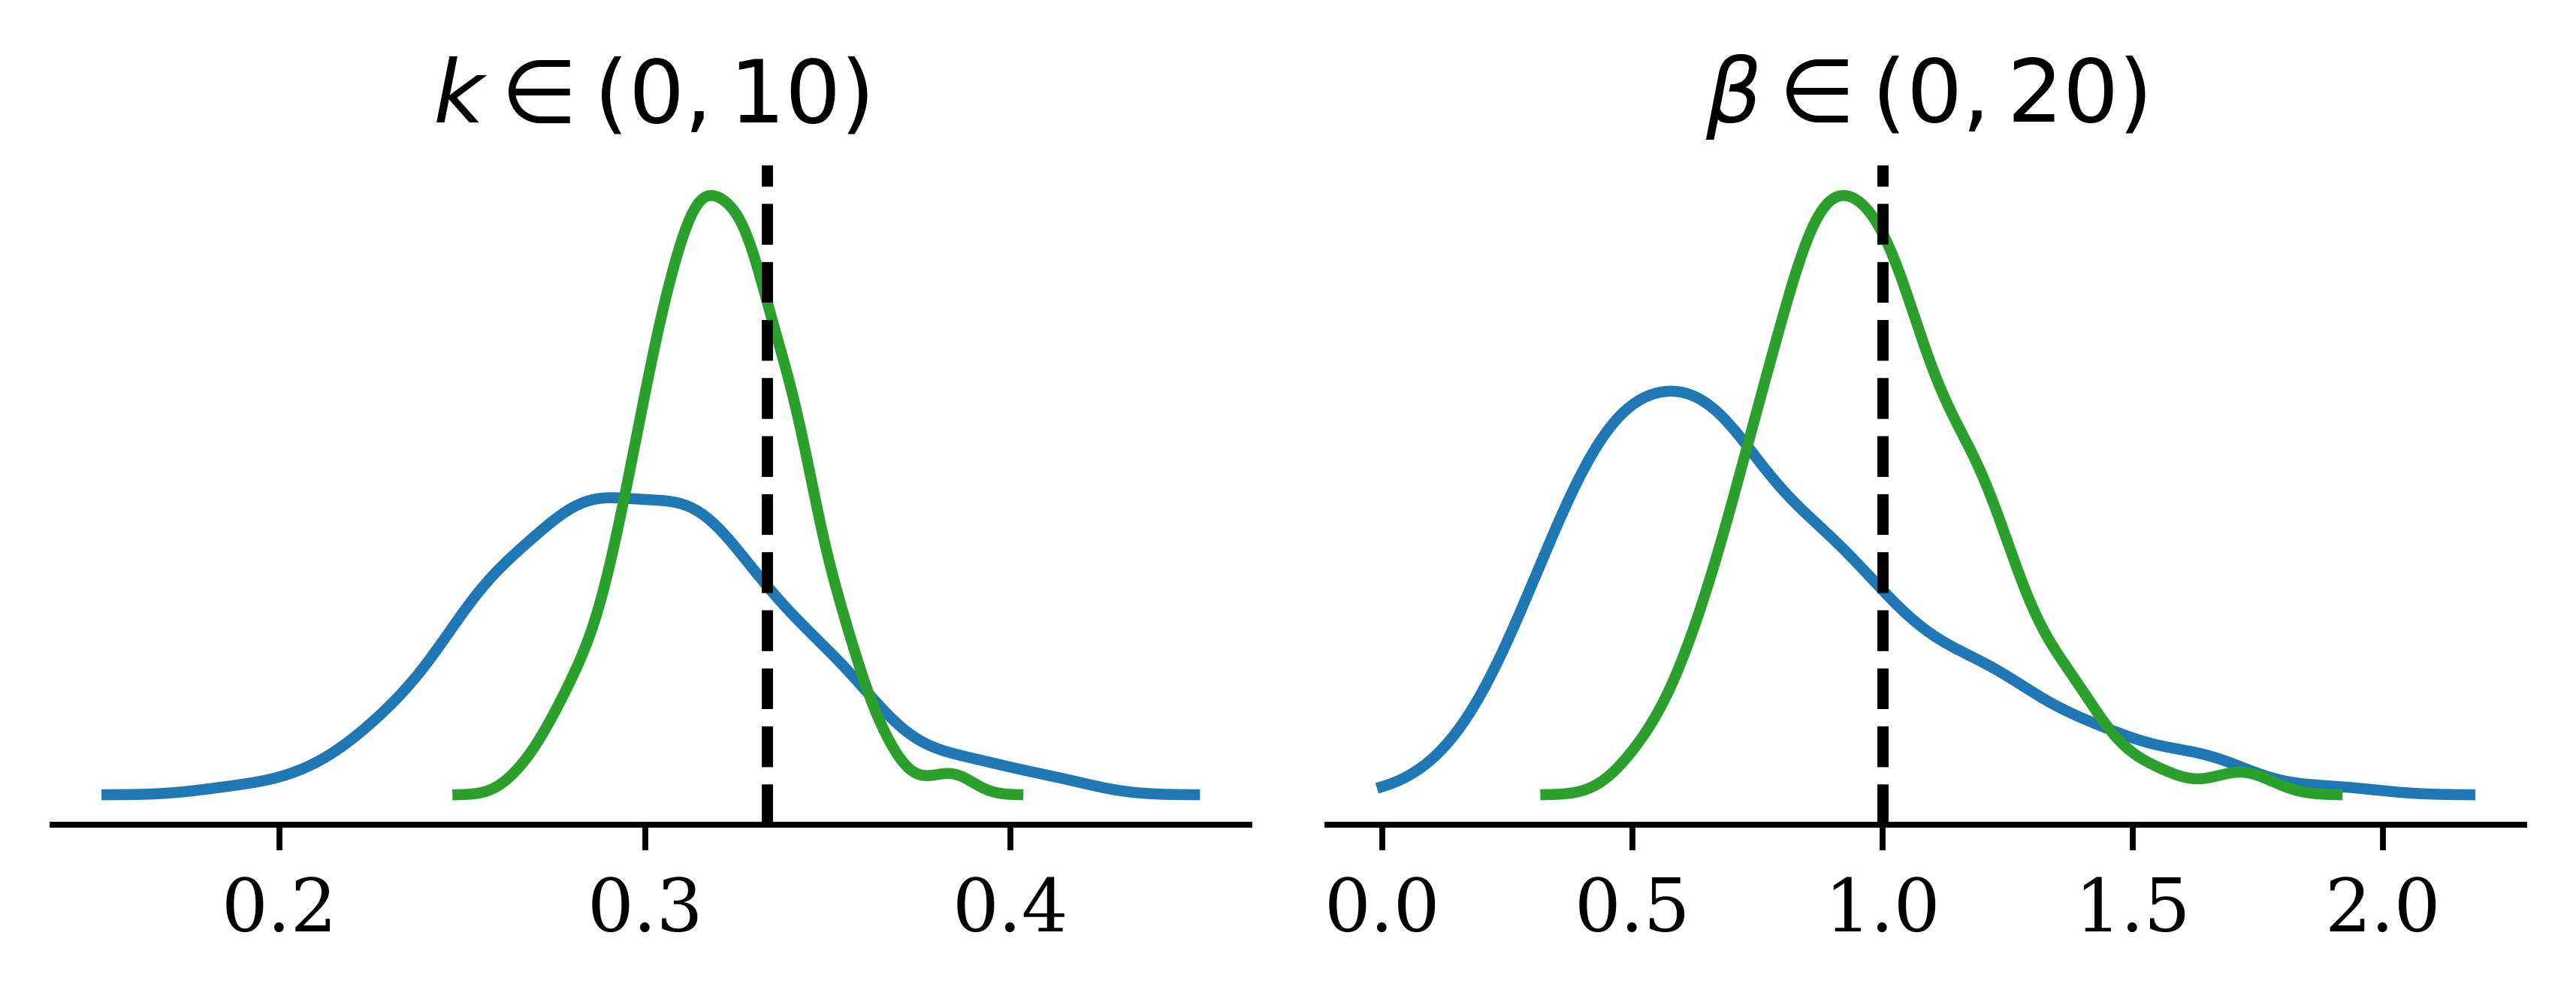

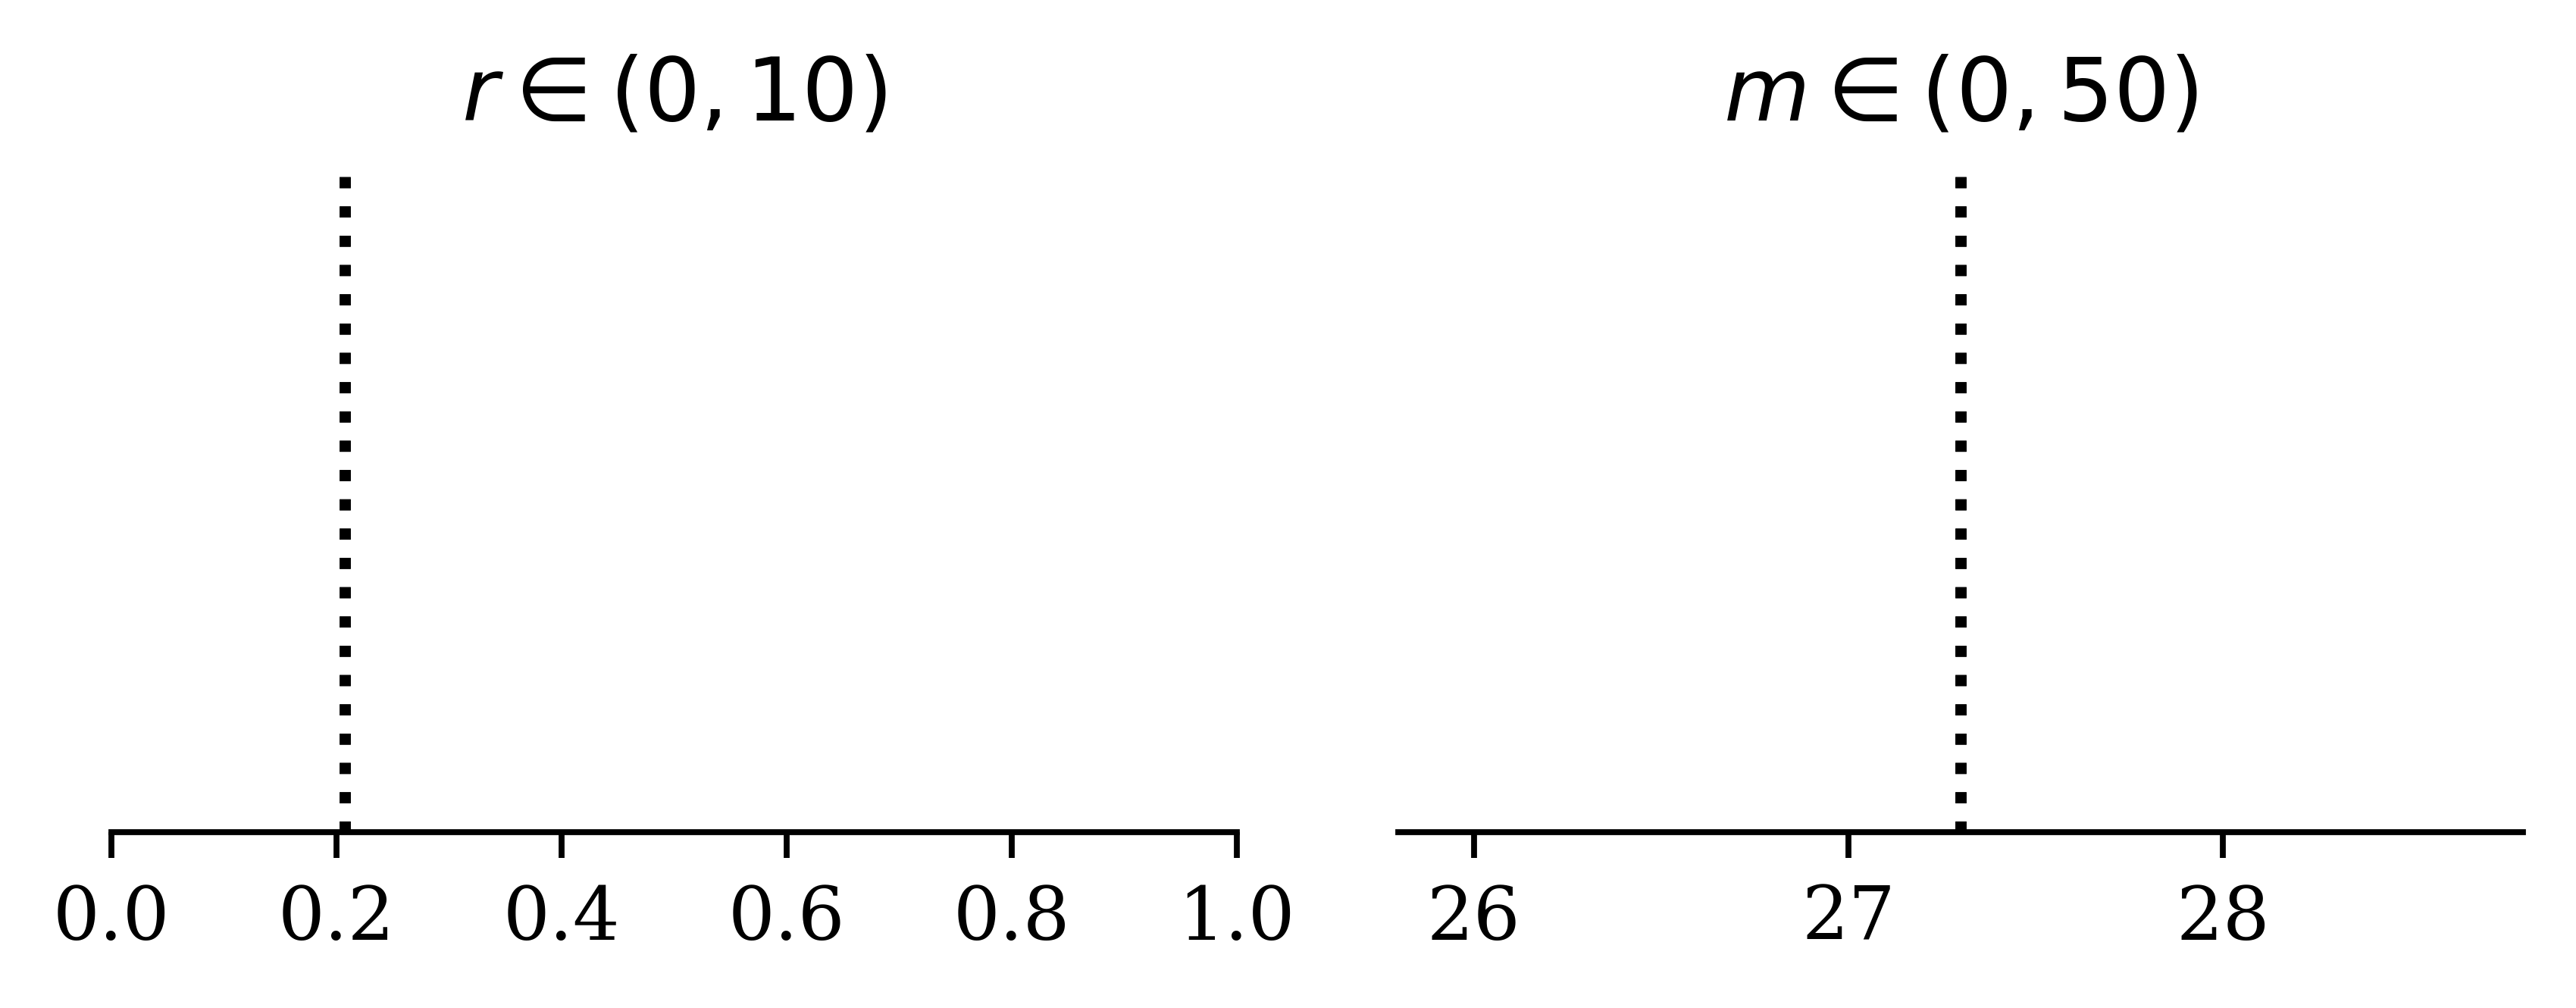

In [14]:
for l in range(len(models)):
    modelName = model_names[l]
    prior = models[l].prior
    fig, axs = plt.subplots(1, len(params[l]), tight_layout=True)

    for k in range(len(params[l])):
        pLims = [prior.marginals[k].isf(1), prior.marginals[k].isf(0)]
        # axs[k].set_xlim(pLims)

        for ss in sample_sizes:
            sampleData = dfabc_freq.query("ss == @ss & model == @modelName")
            selector = (dfabc_freq.ss == ss) & (dfabc_freq.model == model_names[l])
            sample = np.array(dfabc_freq[["param1", "param2"]])[selector, k]
            weights = dfabc_freq.weights[selector].values
            if sampleData.shape[0] > 1:
                dataResampled, xs, ys = abc.resample_and_kde(
                    sample, weights / sum(weights), clip=pLims
                )
                axs[k].plot(xs, ys)

            axs[k].axvline(θ_plot[l][k + 2], **trueStyle)
            axs[k].axvline(θ_mle[l][k + 2], **mleStyle)

            axs[k].set_title(
                "$" + params[l][k] + f"\\in ({pLims[0]:.0f}, {pLims[1]:.0f})$"
            )
            axs[k].set_yticks([])

    sns.despine(left=True)
    # plt.save_cropped(f"../Figures/hist-freqs-weibull-model-selection-{l}.pdf")
Bayesian_Summary

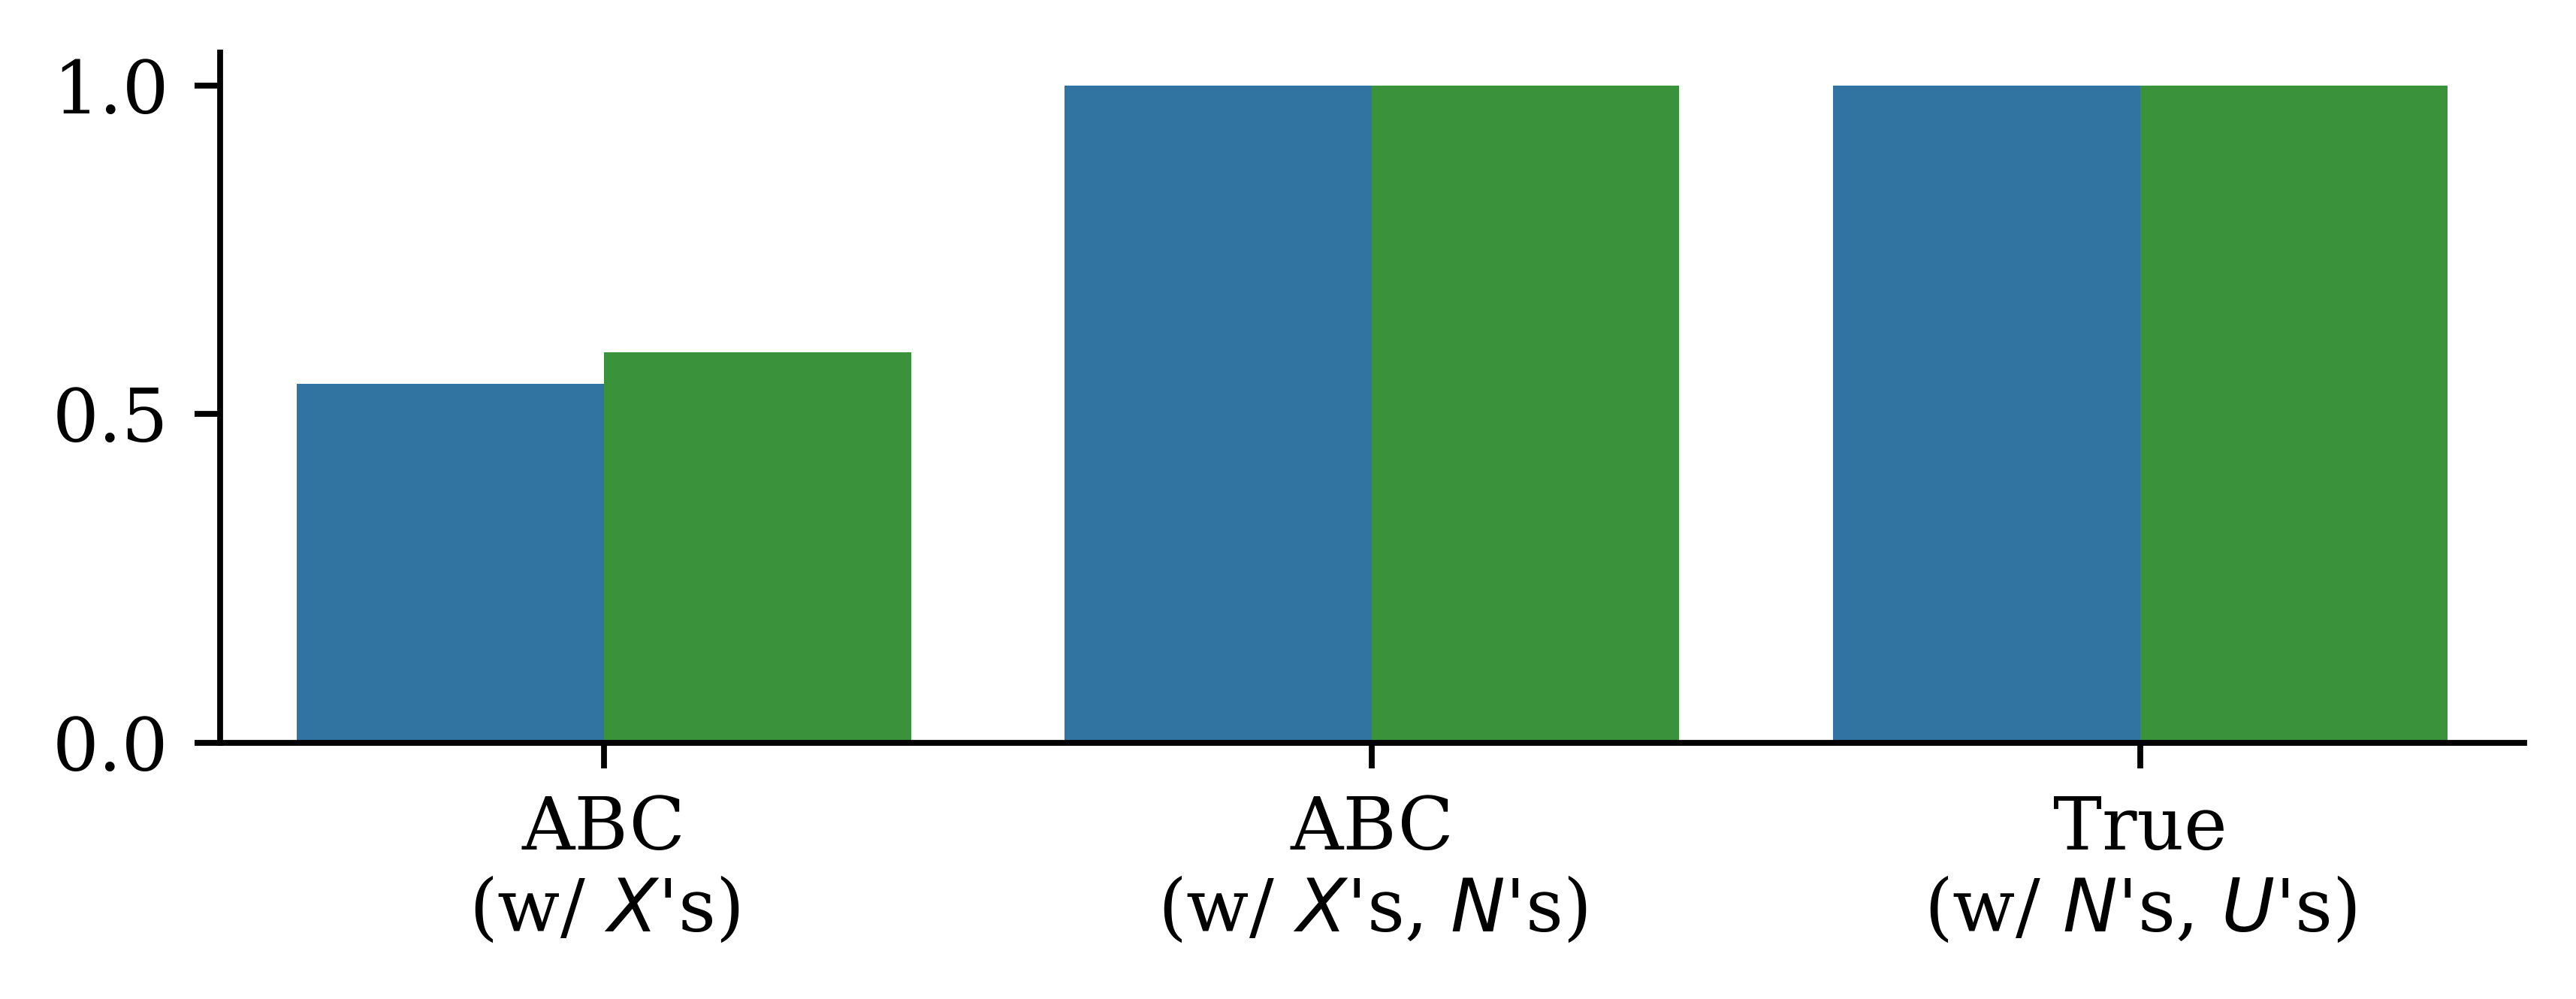

In [16]:
model_proba_df = pd.concat(
    [
        Bayesian_Summary[["model", "ss", "model_probability"]],
        model_proba_abc,
        model_proba_abc_freq,
    ]
)
model_proba_df = model_proba_df[
    np.char.find(model_proba_df.model.tolist(), "weibull") > -1
]

model_proba_df.model = model_proba_df.model.replace(
    {
        "True weibull": "True\n(w/ $N$'s, $U$'s)",
        "ABC negative binomial - weibull": "ABC\n(w/ $X$'s)",
        "ABC with freqs - weibull": "ABC\n(w/ $X$'s, $N$'s)",
    }
)

model_proba_df = model_proba_df.sort_values("model")

fig, ax = plt.subplots(1, 1, tight_layout=True)

g = sns.barplot(
    x="model",
    y="model_probability",
    hue="ss",
    data=model_proba_df,
    #     legend=False,
    ax=ax,
)
plt.legend([], frameon=False)
plt.ylabel("")
plt.xlabel("")
plt.title("")

sns.despine()
save_cropped("../Figures-Slides/barplot-negbin-weibull-model-selection.pdf")

In [17]:
model_proba_df = pd.concat(
    [
        Bayesian_Summary[["model", "ss", "model_probability"]],
        model_proba_abc,
        model_proba_abc_freq,
    ]
)
print(
    pd.pivot_table(
        model_proba_df,
        values="model_probability",
        index=["ss"],
        columns=["model"],
        aggfunc=np.sum,
    ).to_latex()
)

\begin{tabular}{lrrrrrr}
\toprule
model &  ABC negative binomial - gamma &  ABC negative binomial - weibull &  ABC with freqs - gamma &  ABC with freqs - weibull &    True gamma &  True weibull \\
ss    &                                &                                  &                         &                           &               &               \\
\midrule
50.0  &                       0.453952 &                         0.546048 &                     0.0 &                       1.0 &  1.648283e-07 &           1.0 \\
250.0 &                       0.405963 &                         0.594037 &                     0.0 &                       1.0 &  6.275335e-24 &           1.0 \\
\bottomrule
\end{tabular}



In [18]:
elapsed = toc()
print(f"Notebook time = {elapsed:.0f} secs = {elapsed/60:.2f} mins")

Notebook time = 129 secs = 2.15 mins


In [19]:
dill.dump_session("Sim_Weibull_Gamma.pkl")